In [2]:
!pip install graphviz

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from graphviz import Source 

pd.set_option('display.max_columns', None)


from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=0, 
                           n_classes=2, random_state=42)
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Data split: Train samples={len(X_train)}, Test samples={len(X_test)}")



Data split: Train samples=350, Test samples=150


In [4]:
dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

train_acc_full = accuracy_score(y_train, dt_full.predict(X_train))
test_acc_full = accuracy_score(y_test, dt_full.predict(X_test))

print(f"Full DT Training Accuracy: {train_acc_full:.4f}")
print(f"Full DT Test Accuracy: {test_acc_full:.4f}")



Full DT Training Accuracy: 1.0000
Full DT Test Accuracy: 0.8400


In [5]:
dot_data = export_graphviz(
    dt_full, 
    out_file=None, 
    feature_names=feature_names, 
    class_names=['No Disease', 'Disease'],
    filled=True, 
    rounded=True,
    special_characters=True,
    max_depth=3 
)


print("Decision Tree Visualization: 'decision_tree_full.png' file generated (if Graphviz is installed).")





Decision Tree Visualization: 'decision_tree_full.png' file generated (if Graphviz is installed).


In [ ]:
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42) # Control depth [cite: 8]
dt_pruned.fit(X_train, y_train)

train_acc_pruned = accuracy_score(y_train, dt_pruned.predict(X_train))
test_acc_pruned = accuracy_score(y_test, dt_pruned.predict(X_test))

print(f"Pruned DT Training Accuracy (max_depth=3): {train_acc_pruned:.4f}")
print(f"Pruned DT Test Accuracy (max_depth=3): {test_acc_pruned:.4f}")
print("Controlling max_depth reduces overfitting, making the training/test scores closer.")



4wtrjhg


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
train_acc_rf = accuracy_score(y_train, rf_model.predict(X_train))
test_acc_rf = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Random Forest Training Accuracy: {train_acc_rf:.4f}") # Often near 1.0
print(f"Random Forest Test Accuracy: {test_acc_rf:.4f}")

print("\n--- Model Accuracy Comparison ---")
print(f"Unconstrained DT Test Acc: {test_acc_full:.4f}")
print(f"Pruned DT Test Acc: {test_acc_pruned:.4f}")
print(f"Random Forest Test Acc: {test_acc_rf:.4f}")
print("Random Forest often achieves better generalization (higher test accuracy) than a single DT[cite: 18].")



In [ ]:
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = np.array(feature_names)[sorted_indices]

print("Top 5 Most Important Features:")
for i in range(5):
    print(f"{sorted_features[i]}: {sorted_importances[i]:.4f}")




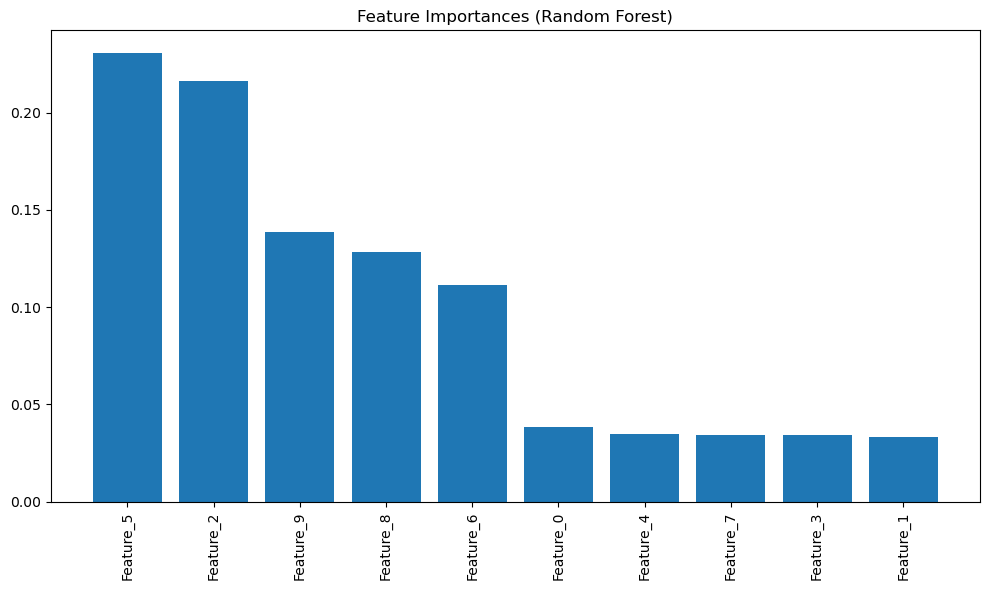

In [7]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(X.shape[1]), sorted_importances, align='center')
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.tight_layout()
# plt.show()

In [8]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1) # 5-fold CV [cite: 11]

print(f"Cross-Validation  Scores (5-Fold): {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"CV Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation  Scores (5-Fold): [0.92 0.91 0.89 0.92 0.95]
Mean CV Accuracy: 0.9180
CV Standard Deviation: 0.0194
